In [1]:
# truncate の分析

In [3]:
%cd ..

/tmp/working


In [30]:
import pandas as pd

df = pd.read_csv("preprocessed/000_base/000/train.csv")
df["prompt2"] = df["prompt"] + " [SEP] " + df["context"]

<Axes: >

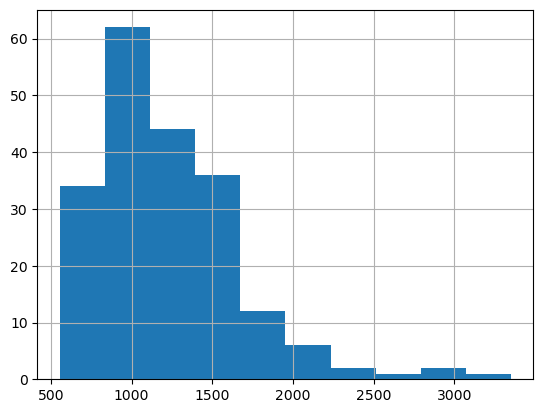

In [31]:
df["prompt2"].str.len().hist()

<Axes: >

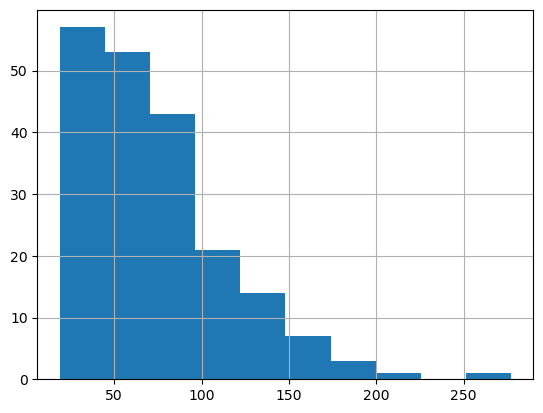

In [27]:
df["prompt"].str.len().hist()

<Axes: >

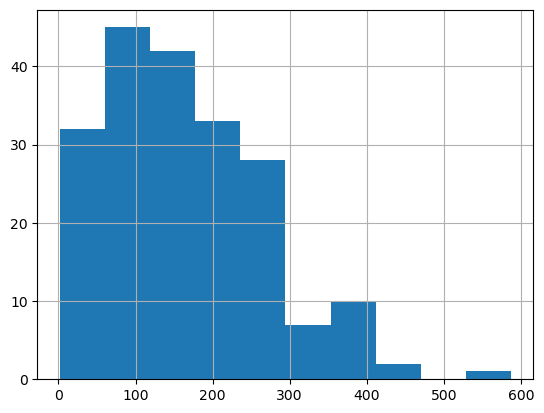

In [29]:
df["E"].str.len().hist()

In [11]:
from transformers import (
    AutoModel,
    AutoModelForMultipleChoice,
    AutoTokenizer,
    EarlyStoppingCallback,
    Trainer,
    TrainingArguments,
)

tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-base")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/opt/conda/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [93]:
tokenized_example = tokenizer(df["prompt2"].tolist(), df["A"].tolist(), truncation=True, max_length=384)
tokenizer.decode(tokenized_example["input_ids"][46])

'[CLS] Who shared the other half of the Nobel Prize with Yoichiro Nambu for discovering the origin of the explicit breaking of CP symmetry in the weak interactions?[SEP] was a Japanese theoretical physicist known for his work on CP-violation who was awarded one quarter of the 2008 Nobel Prize in Physics "for the discovery of the origin of the broken symmetry which predicts the existence of at least three families of quarks in nature." is a Japanese physicist known for his work on CP-violation who was awarded one-fourth of the 2008 Nobel Prize in Physics "for the discovery of the origin of the broken symmetry which predicts the existence of at least three families of quarks in nature." Known for his contributions to the field of theoretical physics, he was awarded half of the Nobel Prize in Physics in 2008 for the discovery in 1960 of the mechanism of spontaneous broken symmetry in subatomic physics, related at first to the strong interaction\'s chiral symmetry and later to the electrow

In [23]:
tokenized_example = tokenizer(df["prompt2"].tolist(), df["A"].tolist(), truncation=True, max_length=50)
tokenizer.decode(tokenized_example["input_ids"][0])

'[CLS] Which of the following statements accurately describes the impact of Modified Newtonian Dynamics (MOND) on the observed "missing baryonic[SEP] MOND is a theory that reduces the observed missing baryonic mass in galaxy clusters by postulating the existence of[SEP]'

In [36]:
tokenizer.all_special_ids

[1, 2, 3, 0, 128000]

In [37]:
tokenizer.all_special_tokens

['[CLS]', '[SEP]', '[UNK]', '[PAD]', '[MASK]']

In [40]:
tokenized_example = tokenizer("[SEP]")
tokenizer.decode(tokenized_example["input_ids"])

'[CLS][SEP][SEP]'

In [101]:
tokenized_example = tokenizer("Hello World... [SEP] Hello World")
tokenizer.decode(tokenized_example["input_ids"])

'[CLS] Hello World...[SEP] Hello World[SEP]'

In [100]:
tokenized_example

{'input_ids': [1, 5365, 964, 323, 260, 260, 2, 5365, 964, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}